In [11]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [12]:
(x_train,_),(_,_) =tf.keras.datasets.mnist.load_data()
x_train = (x_train.astype(np.float32)-127.5)/127.5
x_train = np.expand_dims(x_train,axis=-1)
#X_train = x_train.reshape(-1,28*28)

In [13]:
def build_generator():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256,use_bias = False,input_shape = (100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Reshape((7,7,256)))
  model.add(layers.Conv2DTranspose(128,(5,5),strides = (1,1),padding = 'same',use_bias = False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(64,(5,5),strides = (2,2),padding = 'same',use_bias = False))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2DTranspose(1,(5,5),strides = (2,2),padding = 'same',use_bias = False,activation ='tanh'))
  return model


In [14]:
def build_discriminator():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64,(5,5),strides = (2,2),padding = 'same',input_shape = [28,28,1]))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(.3))

  model.add(layers.Conv2D(128,(5,5),strides = (2,2),padding = 'same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1,activation = 'sigmoid'))
  return model

In [15]:
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [16]:
discriminator.trainable = False
gan_in = layers.Input(shape =(100,))
gan_img = generator(gan_in)
gan_out = discriminator(gan_img)
gan = tf.keras.Model(gan_in,gan_out)
gan.compile(optimizer = 'adam',loss = 'binary_crossentropy')

In [17]:
def train_gan(epochs,batch_size):
  for epoch in range(epochs):
    noise = np.random.normal(0,1,(batch_size,100))
    gan_img = generator.predict(noise)

    real_img = x_train[np.random.randint(0,x_train.shape[0],batch_size)]

    label_real = np.ones((batch_size,1))
    label_fake = np.zeros((batch_size,1))

    d_loss_real = discriminator.train_on_batch(real_img,label_real)
    d_loss_fake = discriminator.train_on_batch(gan_img,label_fake)

    noise = np.random.normal(0,1,(batch_size,100))
    labels = np.ones((batch_size,1))
    g_loss = gan.train_on_batch(noise,labels)
    print(f"epoch {epoch +1}/{epochs}[D loss: {d_loss_real[0]:.4f},acc.:{d_loss_real[1]*100:.2f}%][G loss:{g_loss :.4f}]")

In [18]:
def plot_generated_image(generator,epochs,examples =10,dim=(1,10),figsize = (10,1)):
  noise = np.random.normal(0,1,(examples,100))
  generated_images = generator.predict(noise)
  generated_images = generated_images.reshape(examples,28,28)

  plt.figure(figsize=figsize)
  for i in range(examples):
    plt.subplot(dim[0],dim[1], i+1)
    plt.imshow(generated_images[i],cmap = 'gray')
    plt.axis('off')
plt.show()

In [19]:
train_gan(epochs =1500,batch_size=32)

1/1 [==============================] - 0s 252ms/step
epoch 1/1500[D loss: 0.6988,acc.:50.00%][G loss:0.5522]
1/1 [==============================] - 0s 188ms/step
epoch 2/1500[D loss: 0.1309,acc.:100.00%][G loss:0.1974]
1/1 [==============================] - 0s 187ms/step
epoch 3/1500[D loss: 0.0141,acc.:100.00%][G loss:0.0511]
1/1 [==============================] - 0s 191ms/step
epoch 4/1500[D loss: 0.0022,acc.:100.00%][G loss:0.0110]
1/1 [==============================] - 0s 116ms/step
epoch 5/1500[D loss: 0.0002,acc.:100.00%][G loss:0.0025]
1/1 [==============================] - 0s 114ms/step
epoch 6/1500[D loss: 0.0000,acc.:100.00%][G loss:0.0009]
1/1 [==============================] - 0s 115ms/step
epoch 7/1500[D loss: 0.0000,acc.:100.00%][G loss:0.0002]
1/1 [==============================] - 0s 128ms/step
epoch 8/1500[D loss: 0.0000,acc.:100.00%][G loss:0.0003]
1/1 [==============================] - 0s 114ms/step
epoch 9/1500[D loss: 0.0000,acc.:100.00%][G loss:0.0003]
1/1 [======

1/1 [==============================] - 0s 70ms/step


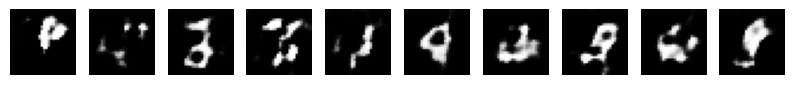

In [21]:
plot_generated_image(generator,epochs = 1500)